In [ ]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
from sklearn import tree
from copy import deepcopy

In [ ]:
diabetes = pd.read_csv('diabetes-dataset.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Encontrar la columna con más ceros

In [ ]:
column=None
zeros=0
diabetes_=diabetes.drop('Outcome', axis=1)
for e in diabetes_:
    n_z=(diabetes_[e] == 0).sum()
    if n_z>zeros:
        column=e
        zeros=n_z
column

'Insulin'

## 2 dataframes, con los ceros y sin los ceros

In [ ]:
diabetes1 = diabetes[diabetes[column] == 0]
diabetes1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
2,0,145,0,0,0,44.2,0.630,31,1
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
9,2,89,90,30,0,33.5,0.292,42,0
...,...,...,...,...,...,...,...,...,...
1988,4,120,68,0,0,29.6,0.709,34,0
1989,4,110,66,0,0,31.9,0.471,29,0
1991,6,102,82,0,0,30.8,0.180,36,1
1993,2,87,0,23,0,28.9,0.773,25,0


In [ ]:
diabetes2 = diabetes[diabetes[column] != 0]
diabetes2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
8,2,83,65,28,66,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1998,0,129,110,46,130,67.1,0.319,26,1


## Se entrena con el dataframe sin ceros en "Insulin"

In [ ]:
y = diabetes2[column]
X_data = diabetes2.copy()
X_data = X_data.drop(columns=column)
X_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,38.2,0.233,23,0
3,0,135,68,42,42.3,0.365,24,1
4,1,139,62,41,40.7,0.536,21,0
5,0,173,78,32,46.5,1.159,58,0
8,2,83,65,28,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...
1994,1,79,60,42,43.5,0.678,23,0
1995,2,75,64,24,29.7,0.370,33,0
1996,8,179,72,42,32.7,0.719,36,1
1998,0,129,110,46,67.1,0.319,26,1


In [ ]:
y

1       125
3       250
4       480
5       265
8        66
       ... 
1994     48
1995     55
1996    130
1998    130
1999     76
Name: Insulin, Length: 1044, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
1012,7,124,70,33,25.5,0.161,37,0
497,2,81,72,15,30.1,0.547,25,0
672,10,68,106,23,35.5,0.285,47,0
127,1,118,58,36,33.3,0.261,23,0
1768,2,56,56,28,24.2,0.332,22,0


In [ ]:
y_train.head()

1012    215
497      76
672      49
127      94
1768     45
Name: Insulin, dtype: int64

In [ ]:
clf = tree.DecisionTreeRegressor(random_state=0, max_depth=18).fit(X_train,y_train)

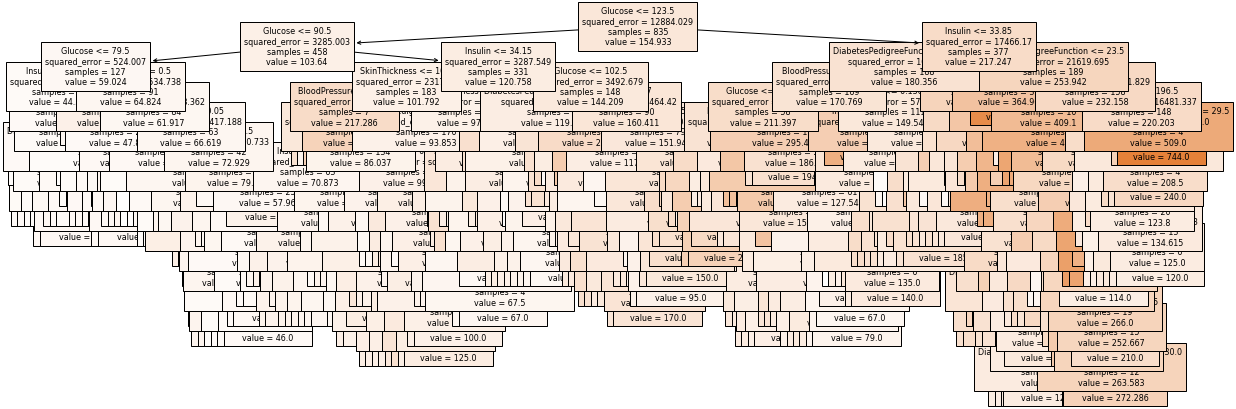

In [ ]:
variables = diabetes.columns
plt.figure(figsize=[20,7])
tree.plot_tree(clf, feature_names=variables, fontsize=8, filled=True)
plt.show()

## Calculo de error medio absoluto

In [ ]:
y_pred = clf.predict(X_train)
absolute_error=mae(y_train,y_pred)
absolute_error

0.07139435414884518

In [ ]:
maximum_abs_error=max(y_train-y_pred)
maximum_abs_error 

7.714285714285722

In [ ]:
squared_error=mse(y_train,y_pred)
np.sqrt(squared_error)

0.628064769752513

## Predicción de las filas con cero en "Insuin"

In [ ]:
X_ = diabetes1.copy()
X_ = X_.drop(columns=column)
y_pred_zeros = clf.predict(X_)

## Se reemplaza los ceros con las predicciones en una copia de la información original, luego se guarda en un csv

In [ ]:
cont=0
ys=list(y_pred_zeros)
diabetes3=deepcopy(diabetes)
for ind in diabetes3.index:
    if diabetes3['Insulin'][ind]==0:
        diabetes3['Insulin'][ind]=ys[cont]
        cont+=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
diabetes3.to_csv('diabetes3.csv')
(diabetes3['Insulin'] == 0).sum()

0